LIBRAIRY

In [184]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [185]:
"""
cv2.morphologyEx(I, cv2.MORPH_OPEN, S)
cv2.morphologyEx(I, cv2.MORPH_CLOSE, S) # fermeture de I par S
cv2.morphologyEx(I, cv2.MORPH_erosion, S) # top-hat de I par S
cv2.morphologyEx(I, cv2.MORPH_BLACKHAT, S) # bottom-hat de I par S
cv2.distanceTransform() # pour le calcul de la carte de distance
np.minimum(A,B) # retourne le minimum élément par élément des arrays A et B

plt.figure() # ouvre une nouvelle figure
plt.imshow(I,'gray') # affichage de l'image I en niveau de
gris,→
plt.show() # déclenche l'affichage

plt.figure() # ouvre une nouvelle figure
plt.subplot(131) # Image 1
plt.imshow(img1, 'binary') # colormap 'binary'
plt.title('Thresholded Image')
plt.subplot(132) # Image 2
plt.imshow(img2, 'gray') # colormap 'gray'
plt.title('Distance Transform')
plt.subplot(133) # Image 3
plt.imshow(img3, 'jet') # colormap 'jet'
plt.title('Labels')
plt.show()

plt.ion()
"""

"\ncv2.morphologyEx(I, cv2.MORPH_OPEN, S)\ncv2.morphologyEx(I, cv2.MORPH_CLOSE, S) # fermeture de I par S\ncv2.morphologyEx(I, cv2.MORPH_erosion, S) # top-hat de I par S\ncv2.morphologyEx(I, cv2.MORPH_BLACKHAT, S) # bottom-hat de I par S\ncv2.distanceTransform() # pour le calcul de la carte de distance\nnp.minimum(A,B) # retourne le minimum élément par élément des arrays A et B\n\nplt.figure() # ouvre une nouvelle figure\nplt.imshow(I,'gray') # affichage de l'image I en niveau de\ngris,→\nplt.show() # déclenche l'affichage\n\nplt.figure() # ouvre une nouvelle figure\nplt.subplot(131) # Image 1\nplt.imshow(img1, 'binary') # colormap 'binary'\nplt.title('Thresholded Image')\nplt.subplot(132) # Image 2\nplt.imshow(img2, 'gray') # colormap 'gray'\nplt.title('Distance Transform')\nplt.subplot(133) # Image 3\nplt.imshow(img3, 'jet') # colormap 'jet'\nplt.title('Labels')\nplt.show()\n\nplt.ion()\n"

1 - Gradient morphologique

        1. Calculer le gradient morphologique de l’image Ampoule.png avec un élément structurant isotrope

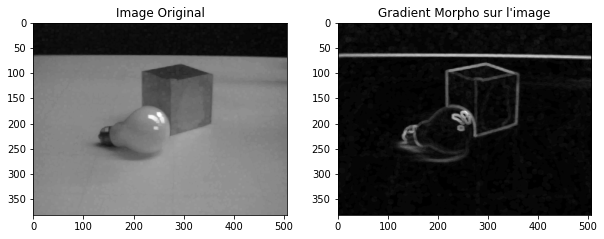

In [186]:
Img = cv2.imread('./images/Ampoule.png', 0)
S_grad = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
erosion = cv2.erode(Img, S_grad, iterations = 1)
dilatation = cv2.dilate(Img, S_grad, iterations = 1)

gradient_morpho = dilatation - erosion

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('Image Original')
plt.imshow(Img,'gray')

plt.subplot(122)
plt.title("Gradient Morpho sur l'image")
plt.imshow(gradient_morpho,'gray')
plt.show()

        2. Proposer un traitement afin d’éliminer le reflet blanc de l’ampoule, tout en limitant l’impact sur les autres éléments de l’image

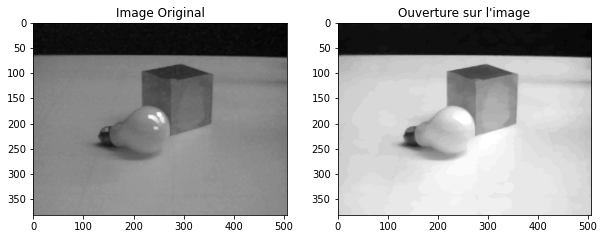

In [187]:
Img = cv2.imread('./images/Ampoule.png', 0)
S_ouv = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(17,13))

ouvert=cv2.morphologyEx(Img, cv2.MORPH_OPEN, S_ouv)

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('Image Original')
plt.imshow(Img,'gray')

plt.subplot(122)
plt.title("Ouverture sur l'image")
plt.imshow(ouvert,'gray')

plt.show()

        3. Calculer à nouveau le gradient morphologique de l’image sans le reflet

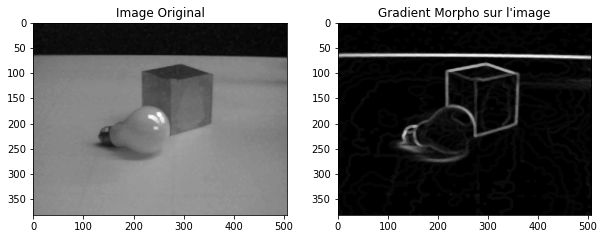

In [188]:
S_grad2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
erosion = cv2.erode(ouvert, S_grad2, iterations = 1)
dilatation = cv2.dilate(ouvert, S_grad2, iterations = 1)

gradient_morpho2 = dilatation - erosion

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('Image Original')
plt.imshow(Img,'gray')

plt.subplot(122)
plt.title("Gradient Morpho sur l'image")
plt.imshow(gradient_morpho2,'gray')
plt.show()

        4. Analyser l’effet de la taille de l’élément structurant

2 - Comptage d’éléments

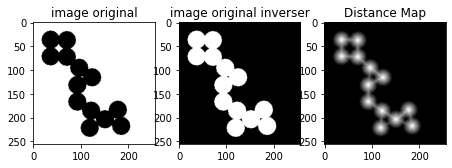

In [189]:
Img = cv2.imread('./images/blobs2.png', 0)
Img_inv = np.invert(Img)

distance_map = cv2.distanceTransform(Img_inv,cv2.DIST_L2,3)

plt.figure(figsize=(10,10))

plt.subplot(141)
plt.title('image original')
plt.imshow(Img,'gray')

plt.subplot(142)
plt.title('image original inverser')
plt.imshow(Img_inv,'gray')

plt.subplot(143)
plt.title('Distance Map')
plt.imshow(distance_map,'gray')
plt.show()

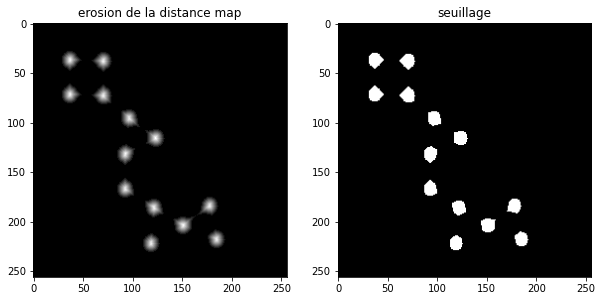

In [190]:
S_erosion = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(21,21))
Map_erosion = cv2.erode(distance_map, S_erosion, iterations = 1)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('erosion de la distance map')
plt.imshow(Map_erosion,'gray')

Map_erosion[Map_erosion>2] = 255 

plt.subplot(122)
plt.title('seuillage')
plt.imshow(Map_erosion,'gray')

plt.show()

In [191]:
number = cv2.connectedComponents(Map_erosion.astype(np.uint8()))
print('il y a',number[0],"cercle sur l'image")

il y a 14 cercle sur l'image


3 - Détection de structures d’intérêts

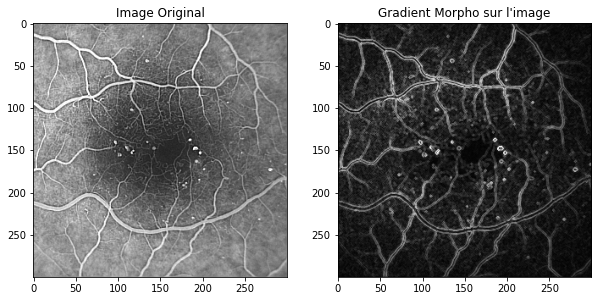

In [192]:
Img = cv2.imread('./images/angiogram.png', 0)
S_grad = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
erosion = cv2.erode(Img, S_grad, iterations = 1)
dilatation = cv2.dilate(Img, S_grad, iterations = 1)

gradient_morpho = dilatation - erosion

plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('Image Original')
plt.imshow(Img,'gray')

plt.subplot(122)
plt.title("Gradient Morpho sur l'image")
plt.imshow(gradient_morpho,'gray')
plt.show()

4 - Reconstructions morphologiques

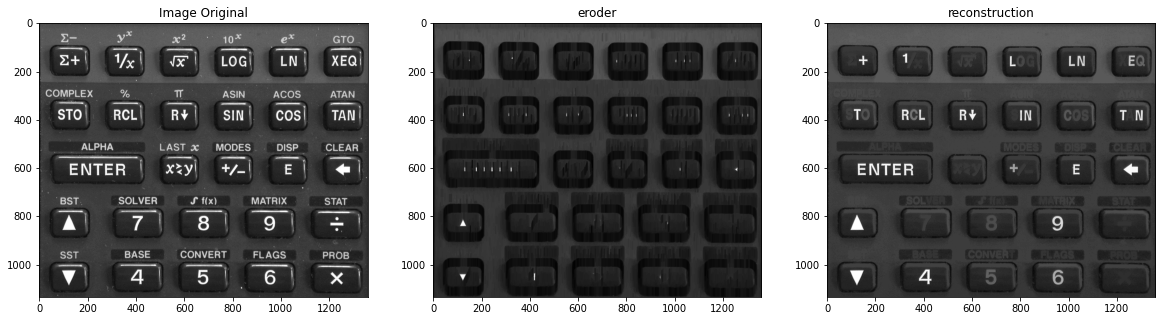

In [224]:
Img = cv2.imread('./images/calculator.png', 0)

plt.figure(figsize = (20,20))
plt.subplot(131)
plt.title('Image Original')
plt.imshow(Img,'gray')

S = cv2.getStructuringElement(cv2.MORPH_RECT,(5,33))
Marqueur = cv2.erode(Img, S, iterations=1)

plt.subplot(132)
plt.title("eroder")
plt.imshow(Marqueur,'gray')

Previous_Image = cv2.dilate(Marqueur, S2, iterations=1)


S2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
i=1

#while New_Image != Previous_Image:
for i in range (600):
    # Previous_Image = New_Image
    New_Image = cv2.dilate(New_Image, S2, iterations=1)
    New_Image = np.minimum(Img,New_Image)
    i+=1

plt.subplot(133)
plt.title("reconstruction")
plt.imshow(New_Image,'gray')


plt.show()